# Radiation-based imaging methods


# Exercise session 2 - 2019-03-06

## Solutions

### Contact:

- Lecturer: Dr. Robert Adams, adams@lke.mavt.ethz.ch
- Teaching assistant: Heiko Kromer, heiko.kromer@psi.ch
- Teaching assistant: Benoit Soubelet, benoit.soubelet@psi.ch

## Exercise 1 - Valley of minimal error

*Derive the valley of minimal error for density gauging (gamma densitometry) and show that it has a minimum at µx=2. Remember that the variance of Poisson noise is equal to its mean value.*

### Solution

This problem is typical for a density measurement, i.e. the density of sintered materials. The objective is to optimize the setup with respect to x or t.

...See handwritten notes...

$$\Delta \mu = \frac{1}{x*C} * \Delta C = \frac{1}{x*\sqrt{C}}$$

The relative error is hence $\Delta \mu/\mu$ and reads:

$$\frac{\Delta \mu}{\mu}=\frac{1}{\mu*x}*\frac{1}{\sqrt{C_0*exp[-\mu*x]}}=\frac{1}{\mu*x}*\sqrt{\frac{exp[\mu*x]}{I_0*t}}$$

We can rewrite this:

$$\frac{\Delta \mu}{\mu} = f(y) = \frac{1}{y}*\sqrt{\frac{exp[y]}{a}}$$

Where $a=I_0*t$, and $y=\mu*x$.
Finding the minimum of this function with respect to $y=\mu*x$ will yield an extreme value (minimum or maximum).

#### Finding the minimum of the function $f(y)$

In [117]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
init_printing()  # sympy inline printing

In [97]:
y,a = symbols('y a')  # initialize symbols

def f(y,a): 
    return (1/y)*sqrt((exp(y)/a))

# differentiate
diff1 = diff(f(y,a),y)
diff2 = diff(f(y,a),y,2)

The first derivative of f(y,a) wrt y is: sqrt(exp(y)/a)/(2*y) - sqrt(exp(y)/a)/y**2


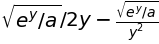

In [98]:
print(f'The first derivative of f(y,a) wrt y is: {diff1}')
diff1

The second derivative of f(y,a) wrt y is: sqrt(exp(y)/a)*(1/4 - 1/y + 2/y**2)/y


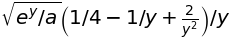

In [99]:
print(f'The second derivative of f(y,a) wrt y is: {diff2}')
diff2

In [100]:
min_or_max = solveset(Eq(diff1, 0), y)
min_or_max

In [101]:
diff2.subs(y,2)

This is a positive number since $a=I_0*t$ is positive. Hence the $y=\mu*x=2$ is the minimum!

#### Plot the valley of minimal error


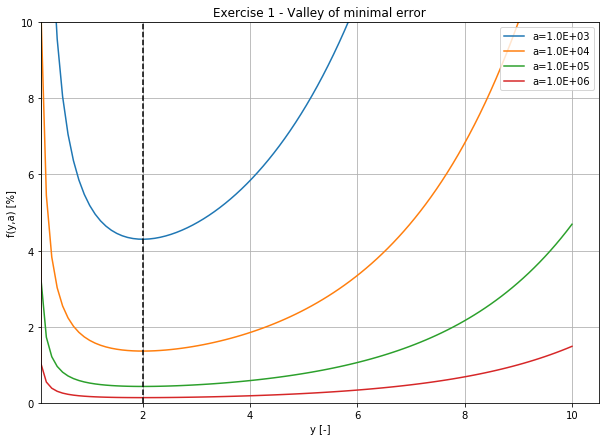

In [131]:
x = np.linspace(0.001,10,100)
a = np.asarray([1e3, 1e4, 1e5, 1e6])

def f(y,a): 
    return (1/y)*np.sqrt((np.exp(y)/a))

plt.figure(figsize=(10, 7))
# plot
for a_i in a:
    plt.plot(x, f(x,a_i)*100, label='a=%.1E'%a_i)


plt.plot([2, 2], [0, 10],'k--')
plt.ylim(0,10)
plt.xlim(0.10)
plt.ylabel('f(y,a) [%]')
plt.xlabel('y [-]')
plt.title('Exercise 1 - Valley of minimal error')
plt.legend(loc=1)
plt.grid()
plt.show()

$\frac{\Delta \mu}{\mu} = f(y) = \frac{1}{y}*\sqrt{\frac{exp[y]}{a}}$

Where $a=I_0*t$, and $y=\mu*x$.